In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib import cm

In [52]:
data = pd.read_csv('closed_positions (7).csv')

In [54]:
data.dropna(inplace=True)
data

,symbol,side,realizedpnl,percent_pnl,costbasis,quantity,entrydate,closedate,strategy,strategydescription,tradePlanTemplate,accountId,day
0,NVDA,buy,0.00,0.00,4972.59,21.0,2022-01-26T13:30:29.000-0500,2022-01-26T13:31:18.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26
1,PFE,buy,-0.95,-0.02,4998.90,95.0,2022-01-26T15:27:38.000-0500,2022-01-26T15:27:56.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26
2,MCD,sell_short,0.00,0.00,4984.40,20.0,2022-01-26T15:48:54.000-0500,2022-01-26T15:49:27.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26
3,PFE,buy,-5.58,-0.11,4976.43,93.0,2022-01-26T09:59:15.000-0500,2022-01-26T10:01:16.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26
4,MCD,buy,-4.18,-0.09,4822.77,19.0,2022-01-26T09:59:43.000-0500,2022-01-26T10:06:09.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH,ATS 1,BACKTEST,2022-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,SPY,buy,-0.09,0.00,4764.32,11.0,2022-01-26T15:46:17.000-0500,2022-01-26T15:47:20.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH,ATS 1,BACKTEST,2022-01-26
173,IWM,buy,-15.00,-0.31,4916.50,25.0,2022-01-26T15:46:47.000-0500,2022-01-26T15:47:26.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH,ATS 1,BACKTEST,2022-01-26
174,TSLA,sell_short,-14.55,-0.31,4661.60,5.0,2022-01-26T15:47:50.000-0500,2022-01-26T15:47:50.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26
175,NVDA,sell_short,-14.54,-0.30,4779.60,21.0,2022-01-26T15:47:49.000-0500,2022-01-26T15:48:05.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26


Finding out the time-in-trade for each of the trades and appending it in the dataframe

In [55]:
tradeTime = list(pd.to_datetime(data['closedate']) - pd.to_datetime(data['entrydate']))

In [56]:
data['tradeTime'] = tradeTime

Finding out the time-in-trade (in seconds) for each of the trades and appending it in the dataframe

In [57]:
buyTradeTimeSec = [i.seconds for i in tradeTime]
data['tradeTime(sec)'] = buyTradeTimeSec

In [58]:
data

,symbol,side,realizedpnl,percent_pnl,costbasis,quantity,entrydate,closedate,strategy,strategydescription,tradePlanTemplate,accountId,day,tradeTime,tradeTime(sec)
0,NVDA,buy,0.00,0.00,4972.59,21.0,2022-01-26T13:30:29.000-0500,2022-01-26T13:31:18.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26,0 days 00:00:49,49
1,PFE,buy,-0.95,-0.02,4998.90,95.0,2022-01-26T15:27:38.000-0500,2022-01-26T15:27:56.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26,0 days 00:00:18,18
2,MCD,sell_short,0.00,0.00,4984.40,20.0,2022-01-26T15:48:54.000-0500,2022-01-26T15:49:27.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26,0 days 00:00:33,33
3,PFE,buy,-5.58,-0.11,4976.43,93.0,2022-01-26T09:59:15.000-0500,2022-01-26T10:01:16.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26,0 days 00:02:01,121
4,MCD,buy,-4.18,-0.09,4822.77,19.0,2022-01-26T09:59:43.000-0500,2022-01-26T10:06:09.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH,ATS 1,BACKTEST,2022-01-26,0 days 00:06:26,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,SPY,buy,-0.09,0.00,4764.32,11.0,2022-01-26T15:46:17.000-0500,2022-01-26T15:47:20.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH,ATS 1,BACKTEST,2022-01-26,0 days 00:01:03,63
173,IWM,buy,-15.00,-0.31,4916.50,25.0,2022-01-26T15:46:47.000-0500,2022-01-26T15:47:26.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH,ATS 1,BACKTEST,2022-01-26,0 days 00:00:39,39
174,TSLA,sell_short,-14.55,-0.31,4661.60,5.0,2022-01-26T15:47:50.000-0500,2022-01-26T15:47:50.000-0500,CANDLE_PATTERN,INSIDE_CANDLE-OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26,0 days 00:00:00,0
175,NVDA,sell_short,-14.54,-0.30,4779.60,21.0,2022-01-26T15:47:49.000-0500,2022-01-26T15:48:05.000-0500,CANDLE_PATTERN,OUTSIDE_CANDLE,ATS 1,BACKTEST,2022-01-26,0 days 00:00:16,16


The maximum time-in-trade in the dataset is given below

In [59]:
print(max(data['tradeTime']))

0 days 00:38:00


Plotting the realized PNL with the time-in-trade to see which trades have been more profitable

In [60]:
def format_func(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)

    return "{:02d}:{:02d}".format(minutes, seconds)

formatter = FuncFormatter(format_func)

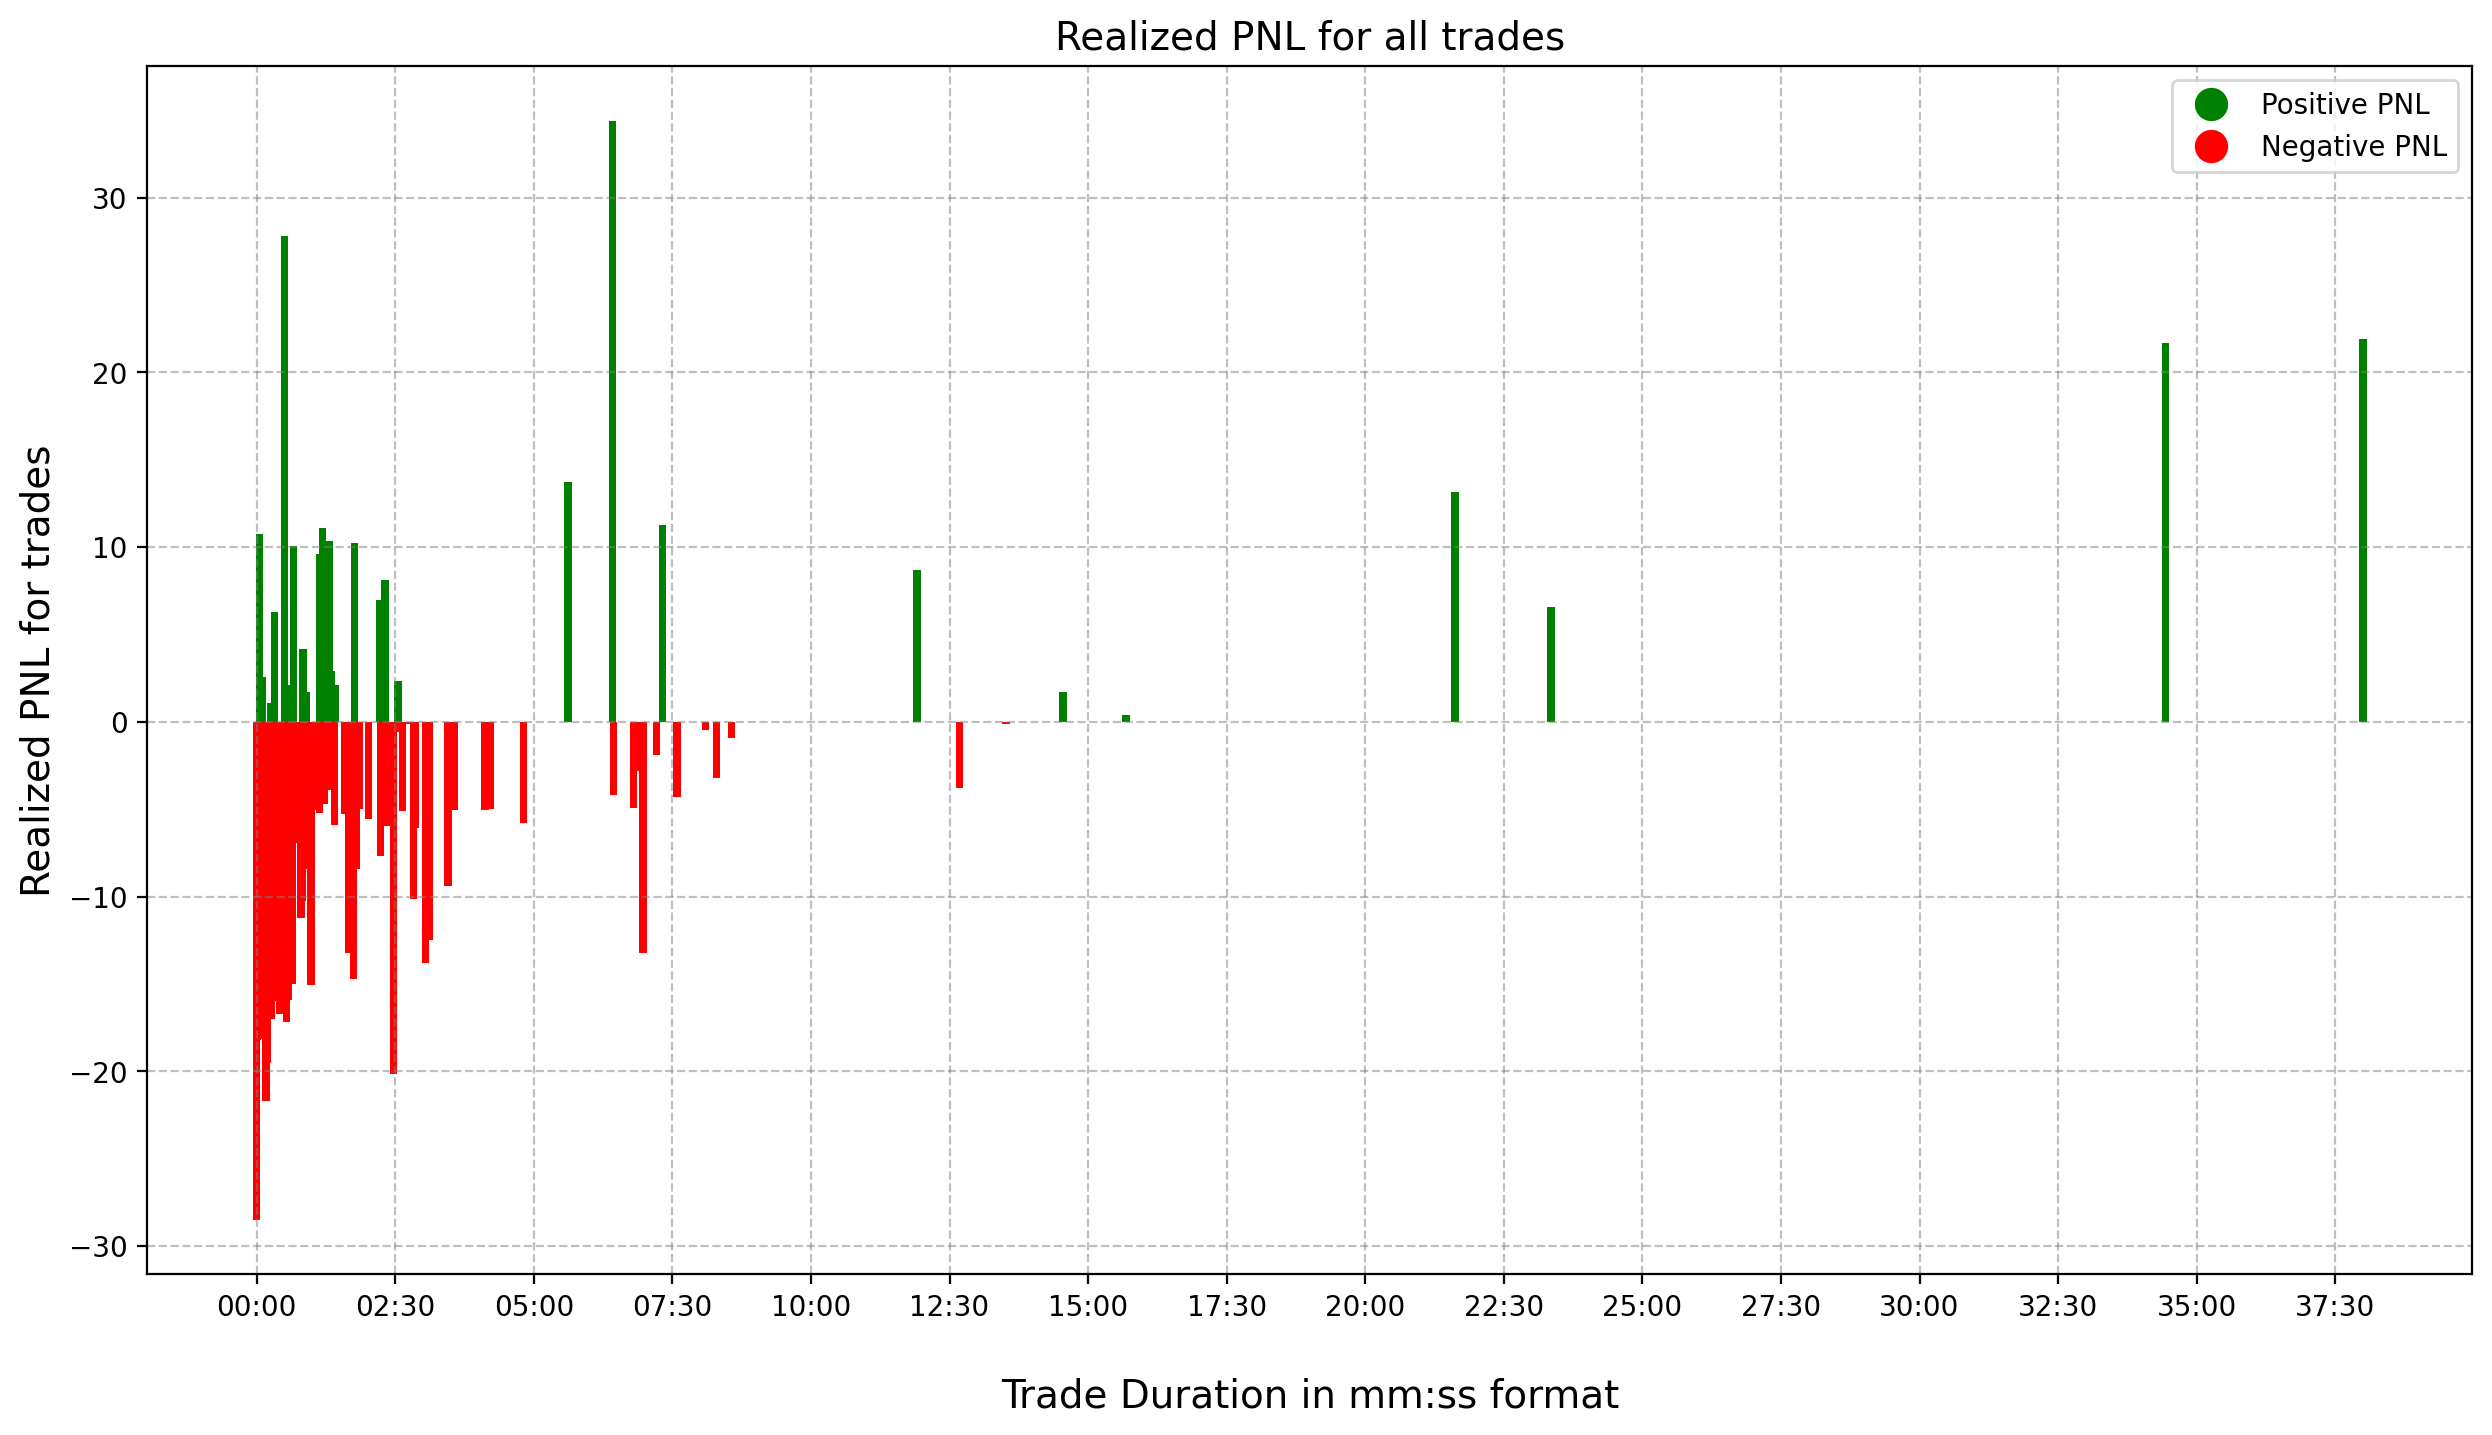

In [61]:
fig = plt.figure(figsize=(15,8), dpi = 200)
ax = fig.add_subplot(1,1,1)
ax.bar(data['tradeTime(sec)'], data['realizedpnl'], width = 8, 
       color=['r' if v < 0 else 'g' for v in data['realizedpnl']])

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', 
                         markerfacecolor=color, markersize=12, markeredgecolor='none') for color in ['g', 'r']]
ax.legend(legend_handles, ['Positive PNL', 'Negative PNL'])

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=150))

plt.xlabel('\nTrade Duration in mm:ss format',fontsize=14)
plt.ylabel('Realized PNL for trades',fontsize=14)
plt.title('Realized PNL for all trades',fontsize=14)
plt.grid(color = 'gray', linestyle = '--', alpha = 0.5)
plt.show()


Grouping the data by Buy and Sell to gain insights about both the sides

In [62]:
buyData = data[data['side'] == 'buy']
sellData = data[data['side'] == 'sell_short']

Plotting the realized PNL with the time-in-trade for both the sides to see which trades have been more profitable

In [63]:
buyPNL = list(buyData['realizedpnl'])
buyTradeTime = list(buyData['tradeTime'])
buyTradeTimeSec = [i.seconds for i in buyTradeTime]

sellPNL = list(sellData['realizedpnl'])
sellTradeTime = list(sellData['tradeTime'])
sellTradeTimeSec = [i.seconds for i in sellTradeTime]


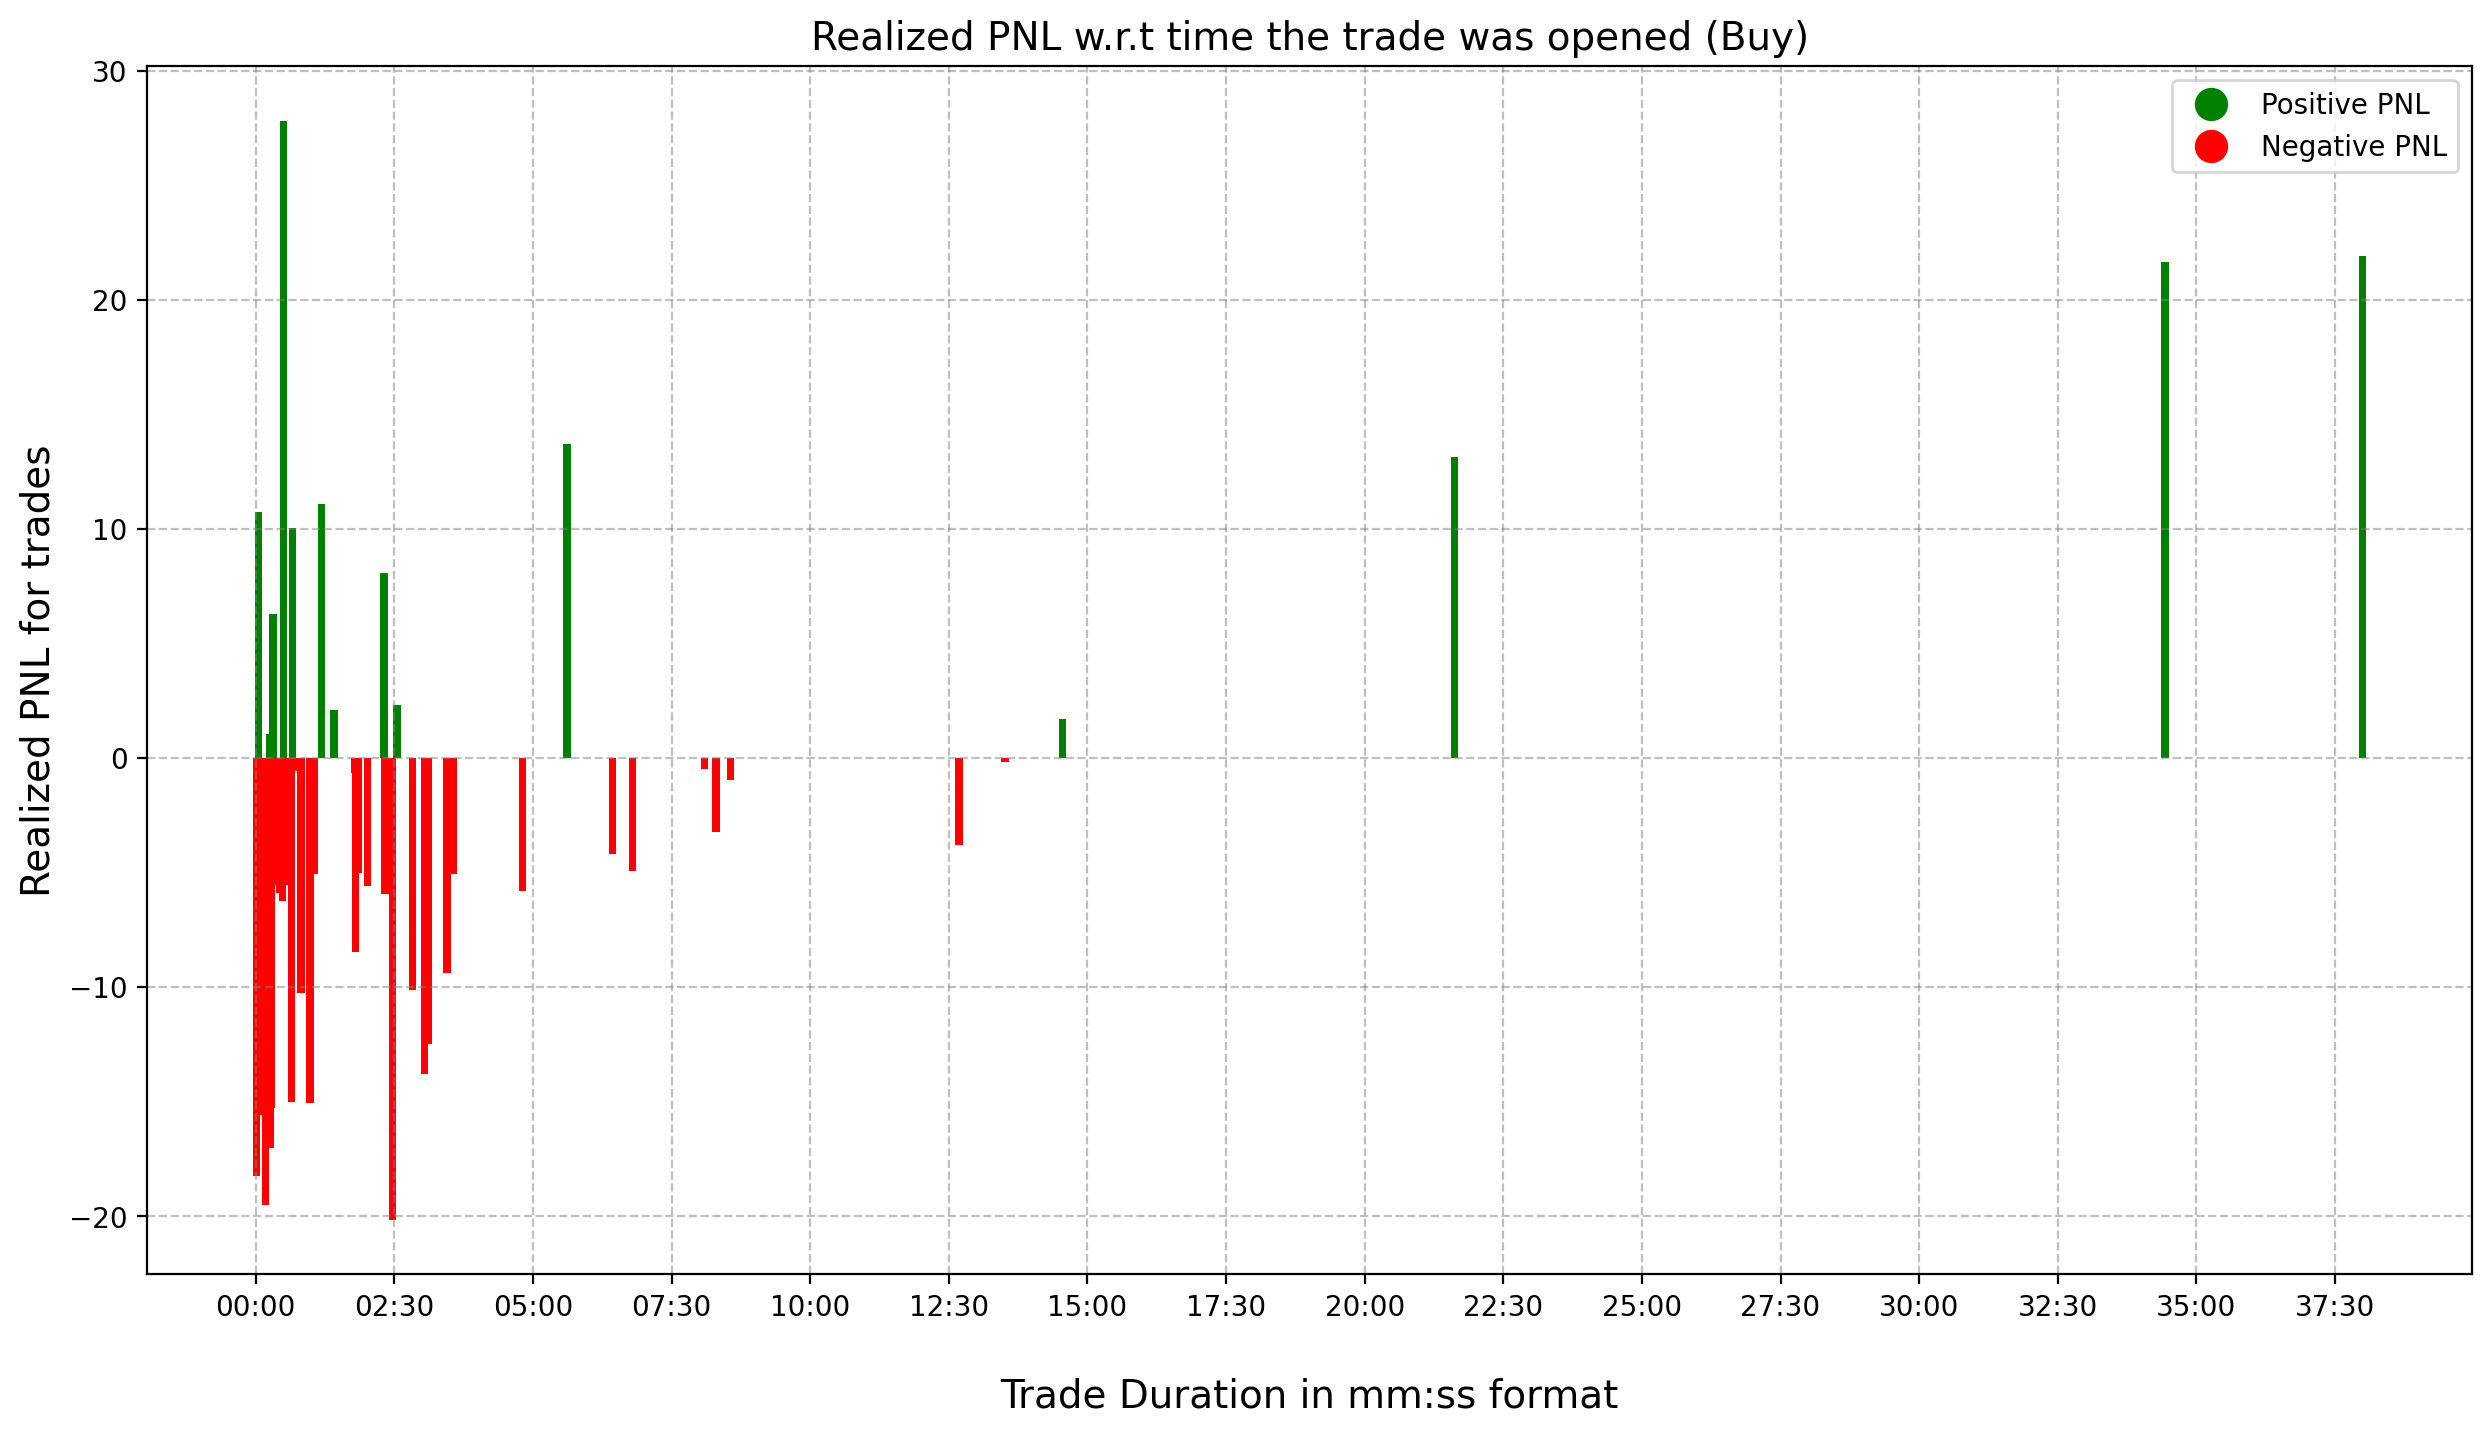

In [64]:
fig = plt.figure(figsize=(15,8), dpi = 200)
ax = fig.add_subplot(1,1,1)
ax.bar(buyTradeTimeSec, buyPNL, width = 8, color=['r' if v < 0 else 'g' for v in buyPNL])

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', 
                         markerfacecolor=color, markersize=12, markeredgecolor='none') for color in ['g', 'r']]
ax.legend(legend_handles, ['Positive PNL', 'Negative PNL'])

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=150))

plt.xlabel('\nTrade Duration in mm:ss format',fontsize=14)
plt.ylabel('Realized PNL for trades',fontsize=14)
plt.title('Realized PNL w.r.t time the trade was opened (Buy)',fontsize=14)
plt.grid(color = 'gray', linestyle = '--', alpha = 0.5)
plt.show()

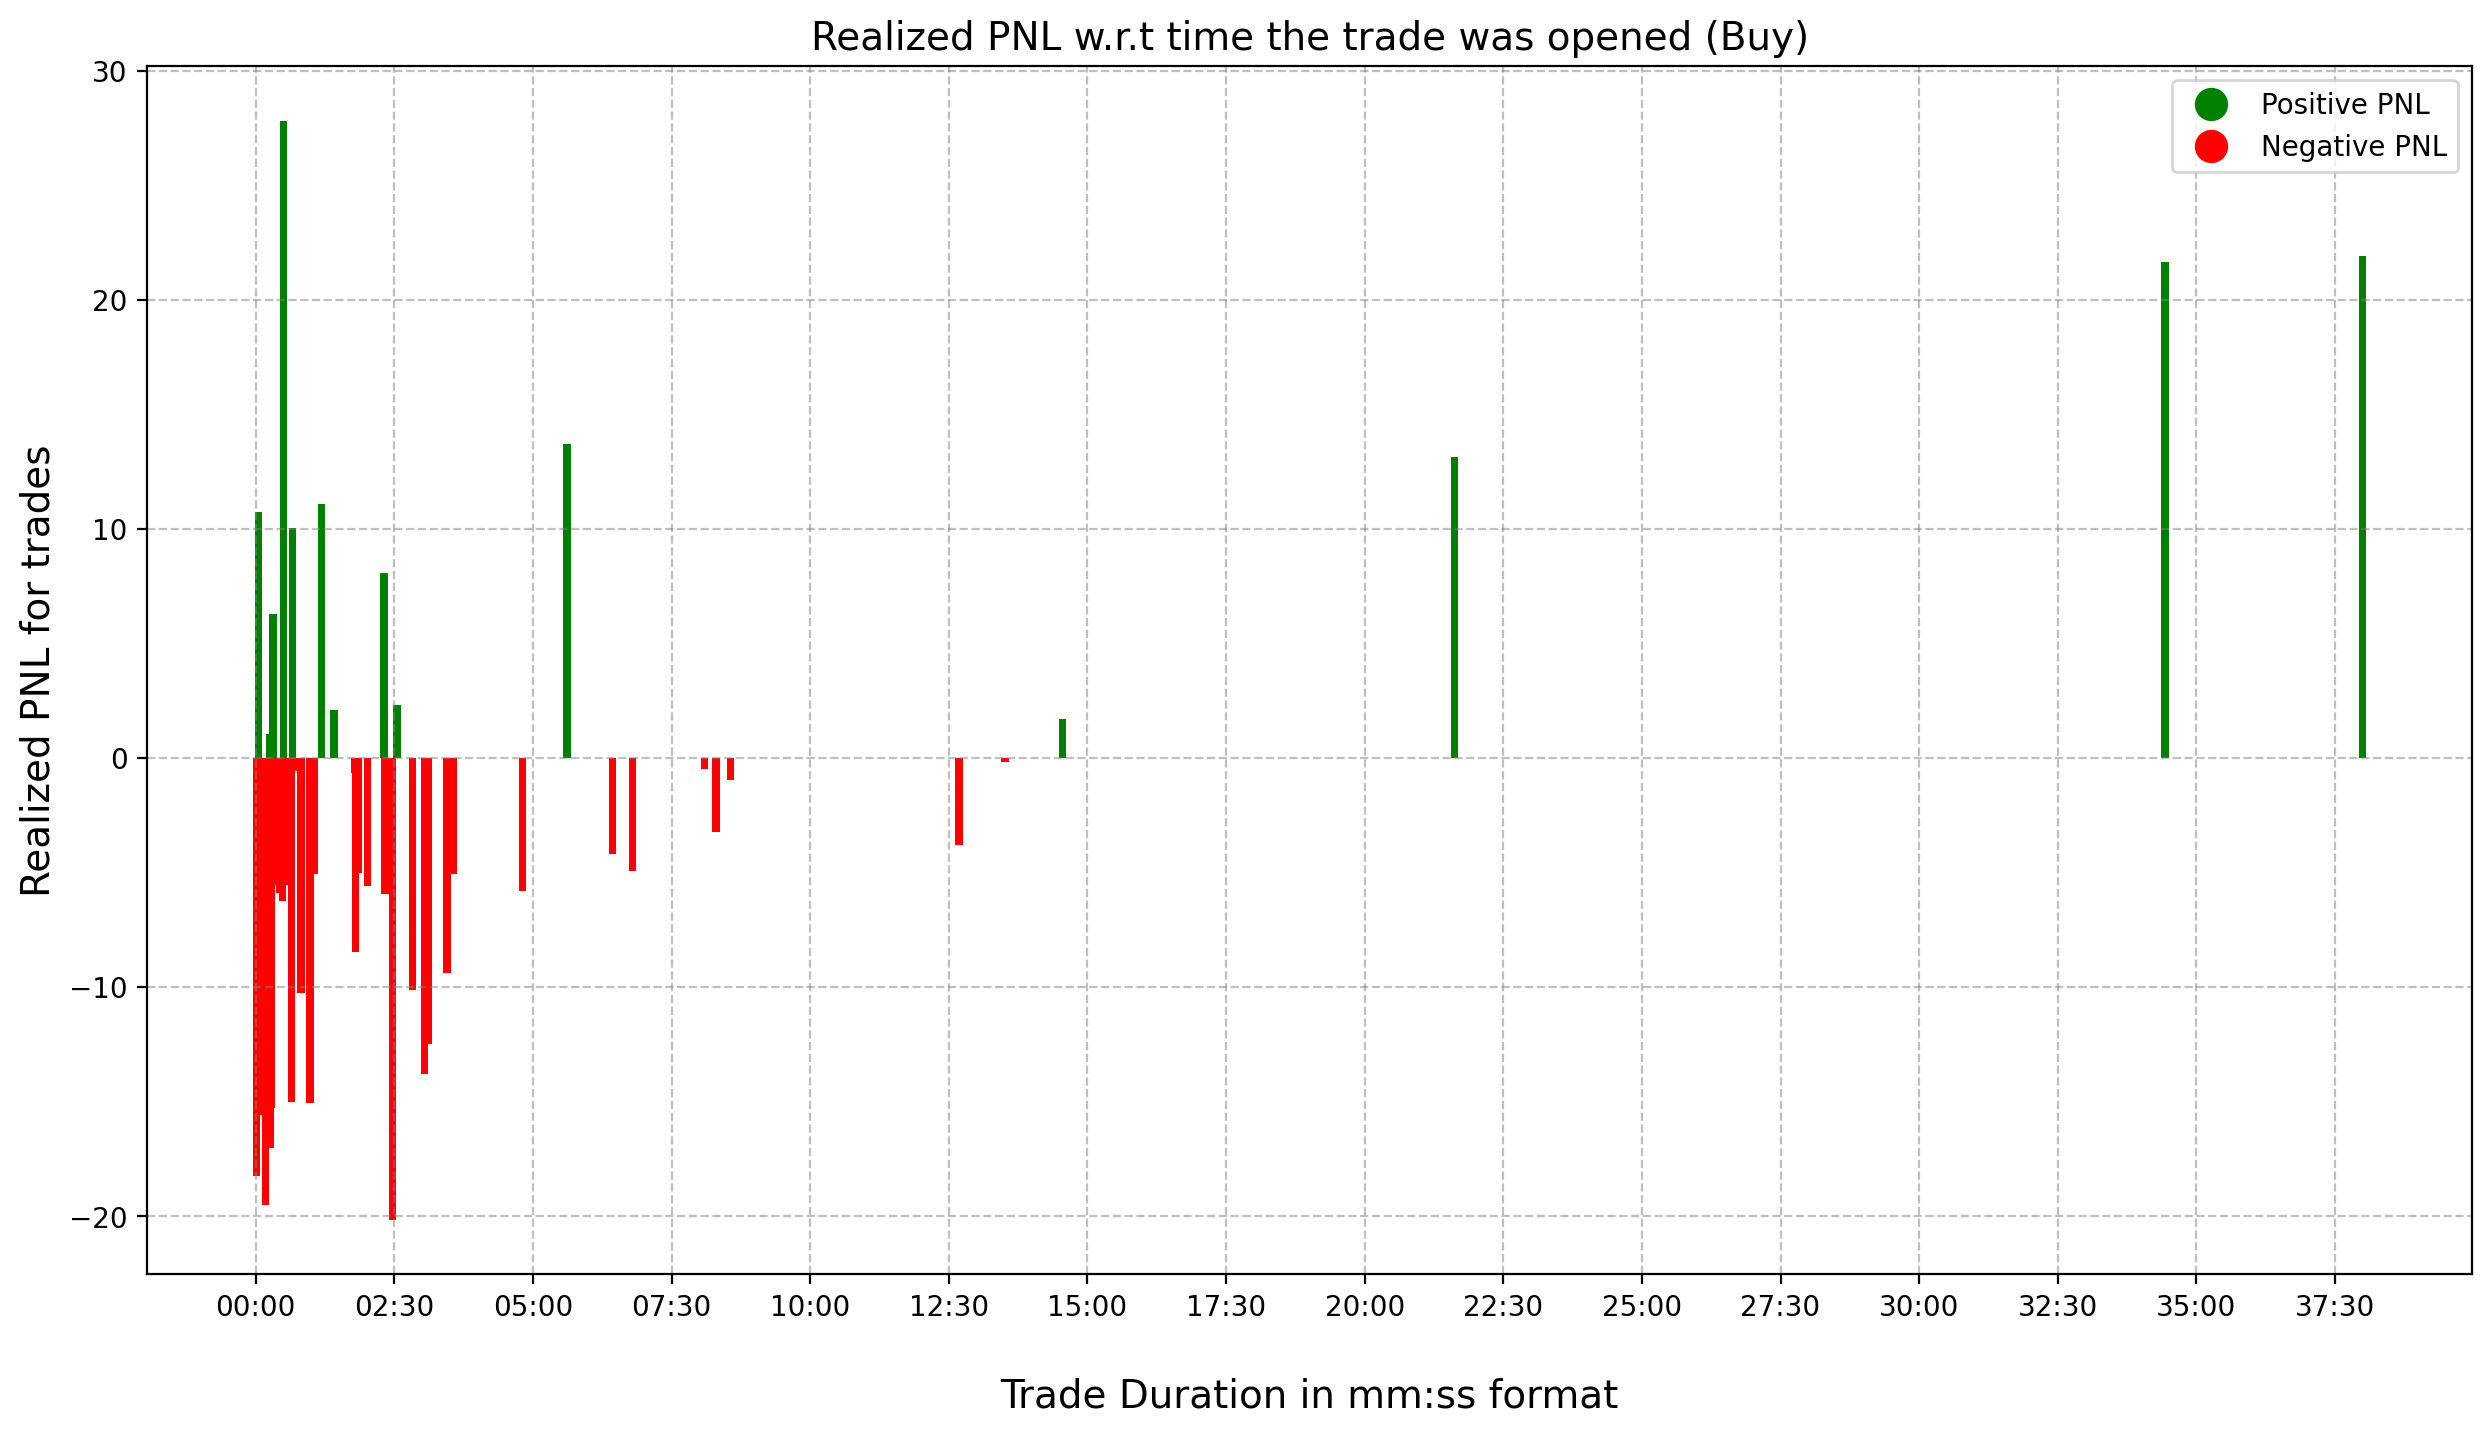

In [65]:
fig = plt.figure(figsize=(15,8), dpi = 200)
ax = fig.add_subplot(1,1,1)
ax.bar(buyTradeTimeSec, buyPNL, width = 8, color=['r' if v < 0 else 'g' for v in buyPNL])

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', 
                         markerfacecolor=color, markersize=12, markeredgecolor='none') for color in ['g', 'r']]
ax.legend(legend_handles, ['Positive PNL', 'Negative PNL'])

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=150))

plt.xlabel('\nTrade Duration in mm:ss format',fontsize=14)
plt.ylabel('Realized PNL for trades',fontsize=14)
plt.title('Realized PNL w.r.t time the trade was opened (Buy)',fontsize=14)
plt.grid(color = 'gray', linestyle = '--', alpha = 0.5)
plt.show()

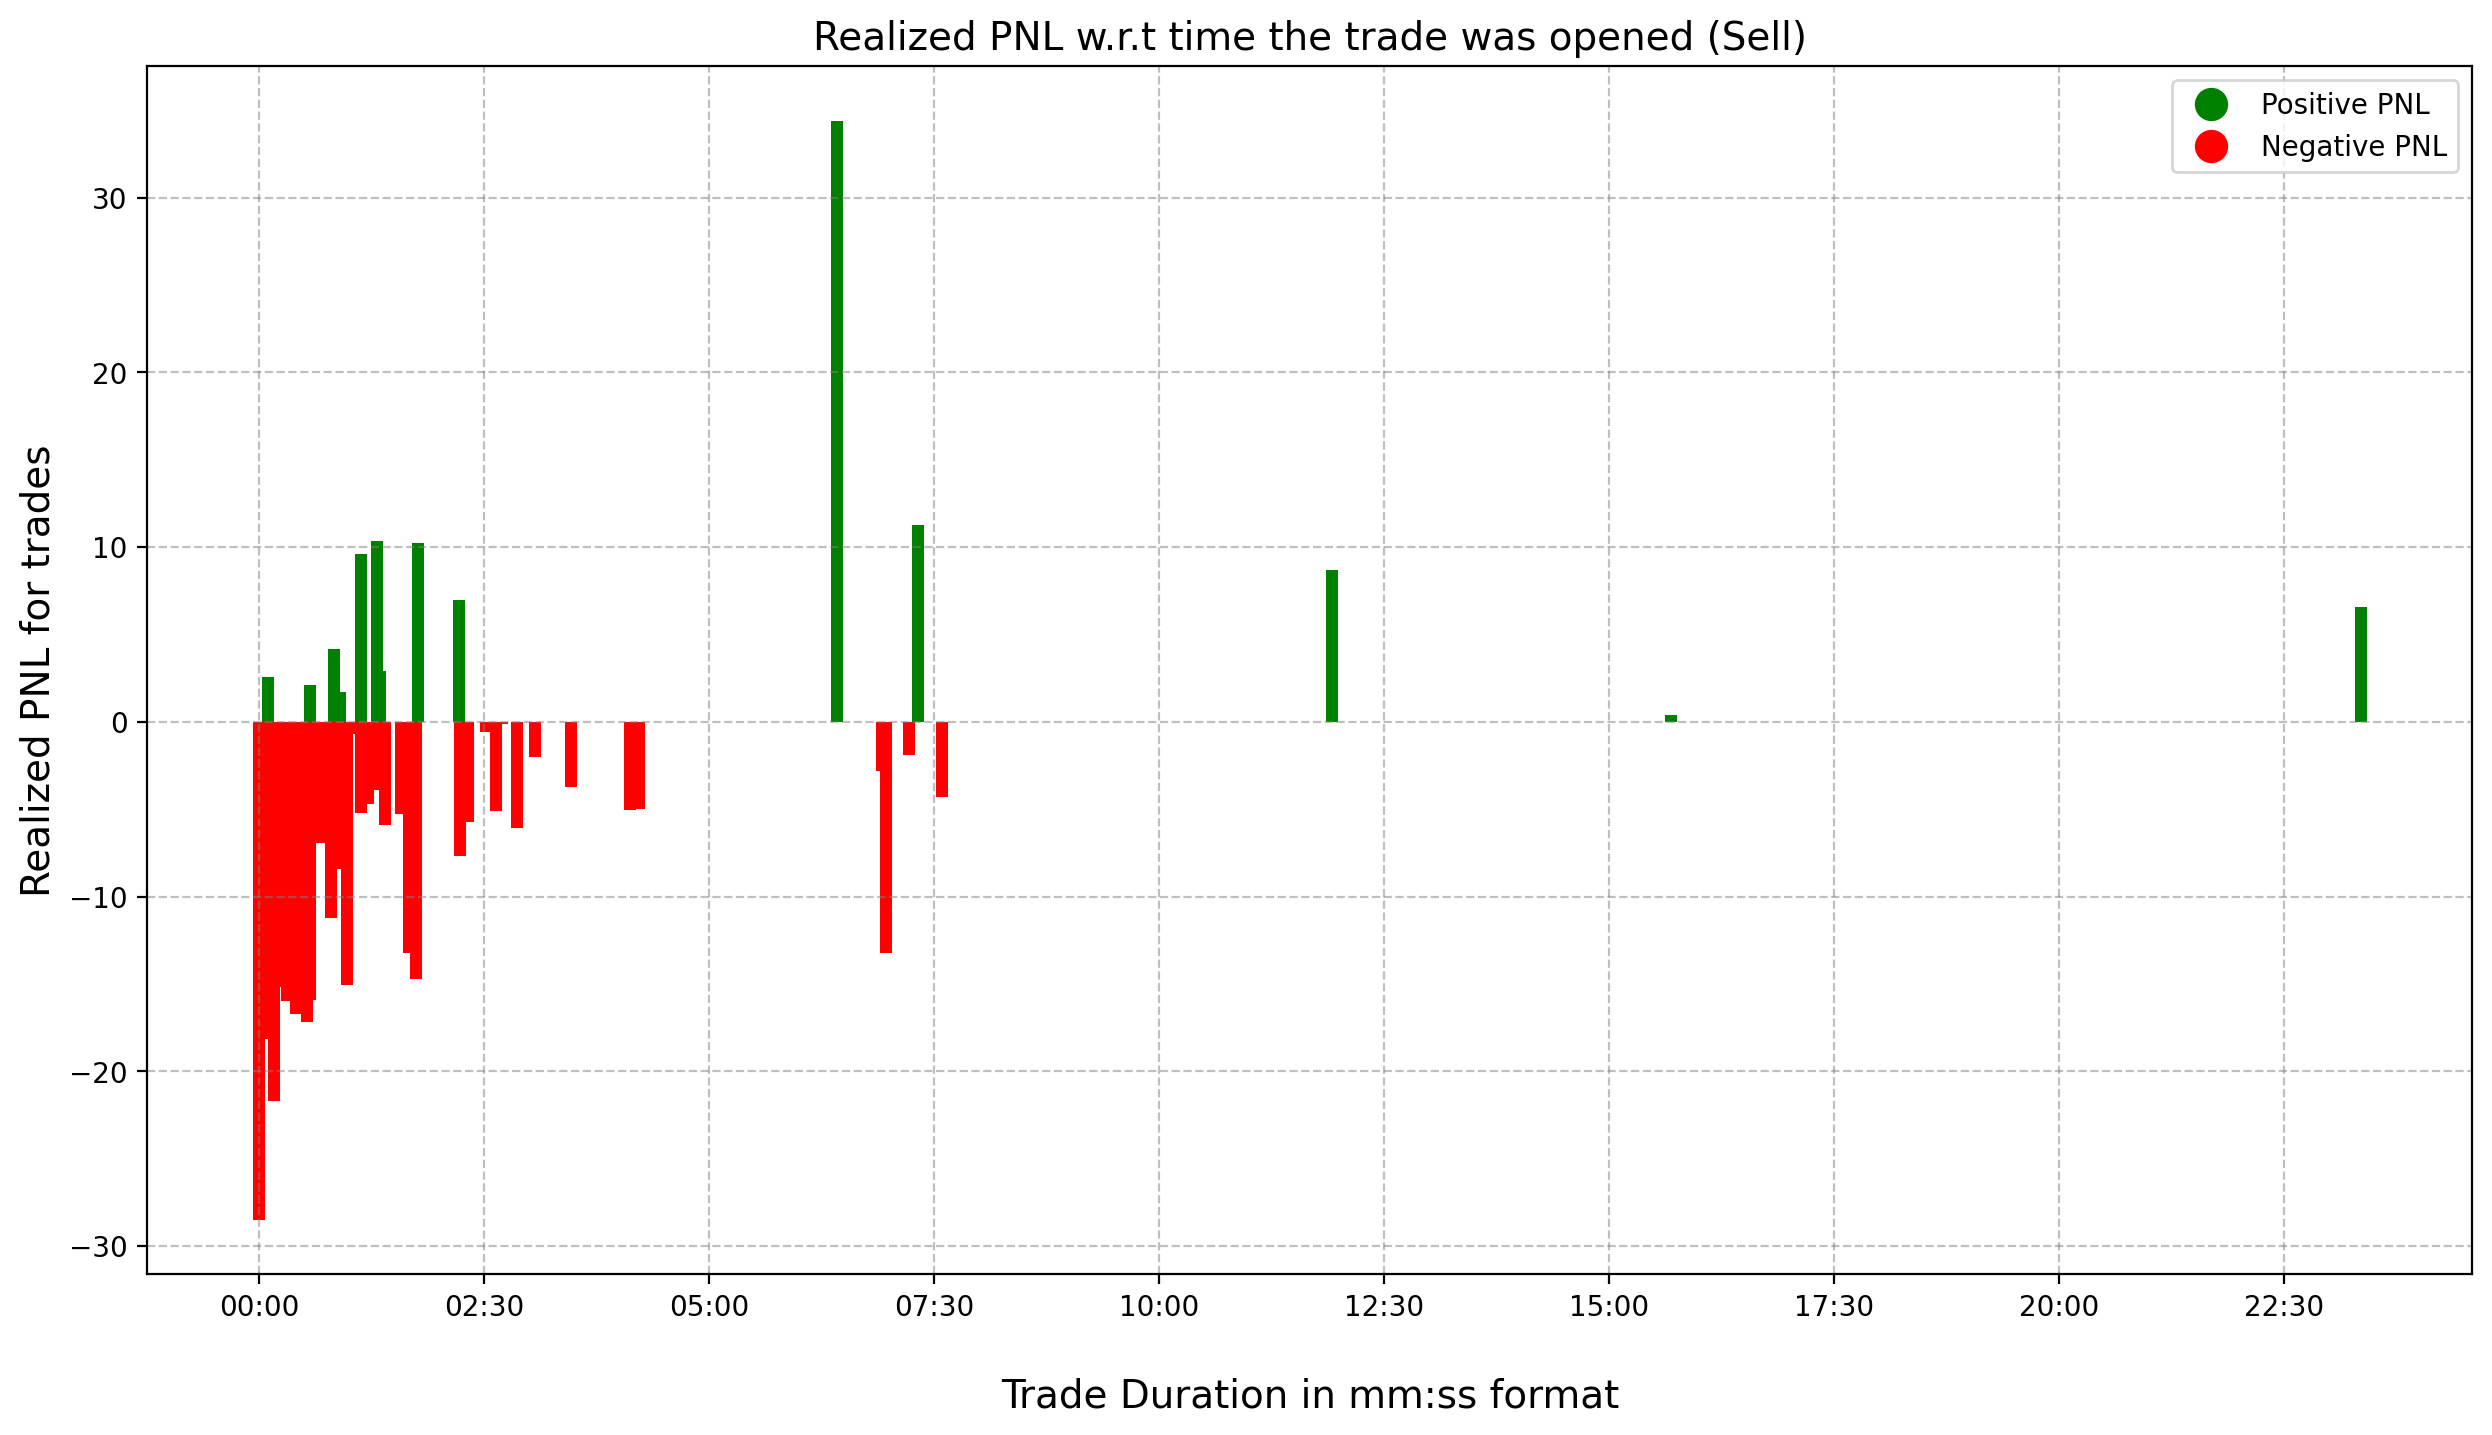

In [66]:
fig = plt.figure(figsize=(15,8), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.bar(sellTradeTimeSec, sellPNL, width = 8, color=['r' if v < 0 else 'g' for v in sellPNL])

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', 
                         markerfacecolor=color, markersize=12, markeredgecolor='none') for color in ['g', 'r']]
ax.legend(legend_handles, ['Positive PNL', 'Negative PNL'])

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=150))

plt.xlabel('\nTrade Duration in mm:ss format',fontsize=14)
plt.ylabel('Realized PNL for trades',fontsize=14)
plt.title('Realized PNL w.r.t time the trade was opened (Sell)',fontsize=14)
plt.grid(color = 'gray', linestyle = '--', alpha = 0.5)
plt.show()

Realized PNL Based on the Strategy Description

In [67]:
data['strategydescription'].unique()

array(['OUTSIDE_CANDLE', 'INSIDE_CANDLE-OUTSIDE_CANDLE',
       'INSIDE_CANDLE-BREAK_LOW-BREAK_HIGH',
       'INSIDE_CANDLE-BREAK_HIGH-BREAK_LOW'], dtype=object)

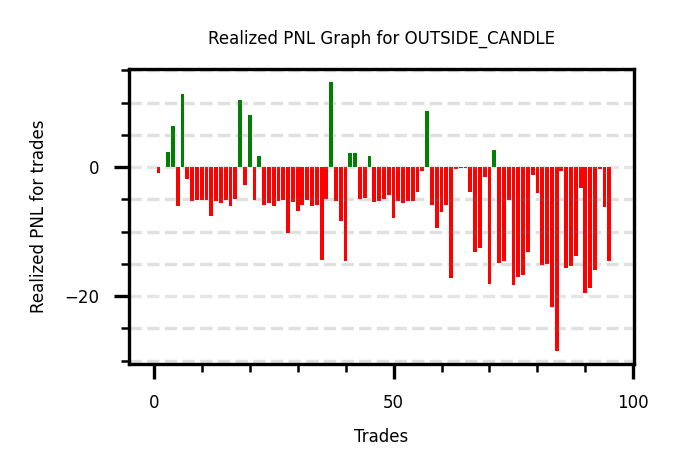

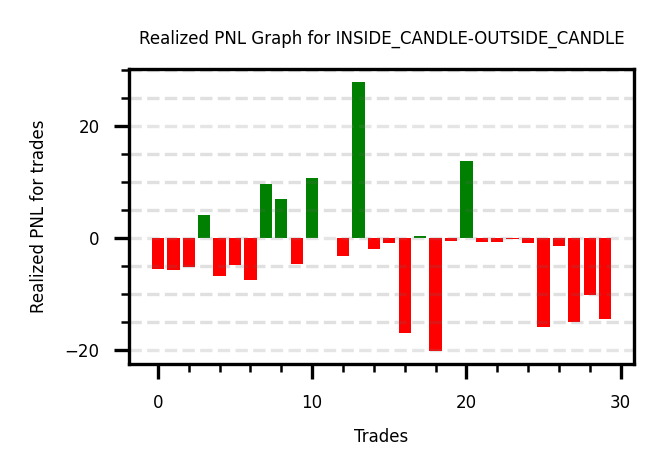

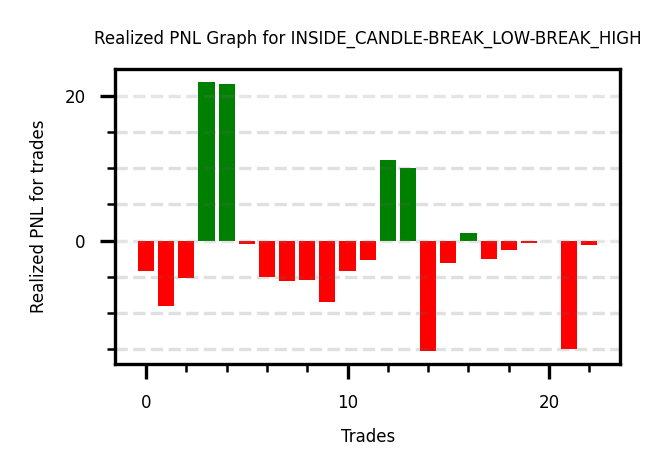

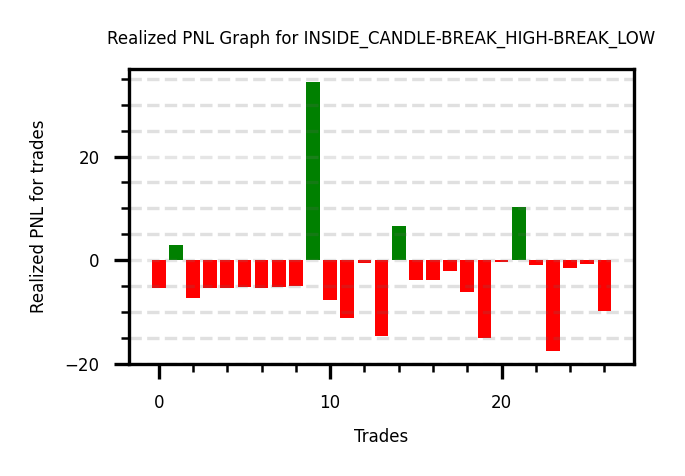

In [68]:
for index, strategy in enumerate(data['strategydescription'].unique()):
    filteredData = data[data['strategydescription'] == strategy]
    
    fig = plt.figure(figsize=(10,6), dpi=300)
    ax = fig.add_subplot(4, len(data['strategydescription'].unique()),index+1)
    ax.bar(np.arange(0, len(filteredData),1), filteredData['realizedpnl'], 
           color=['r' if v < 0 else 'g' for v in filteredData['realizedpnl']])
    
    
    plt.xticks(fontsize=4)
    plt.yticks(fontsize=4)
    plt.xlabel('Trades',fontsize=4)
    plt.ylabel('Realized PNL for trades',fontsize=4)
    plt.title('Realized PNL Graph for '+strategy,fontsize=4)
    plt.grid(color = 'gray', axis = 'y', linestyle = '--', alpha = 0.2)
    plt.minorticks_on()
    plt.grid(color = '#666666', axis = 'y',which='minor', linestyle = '--', alpha = 0.2)
    plt.show()

Realized PNL Based on the Symbols grouped by Strategy Description

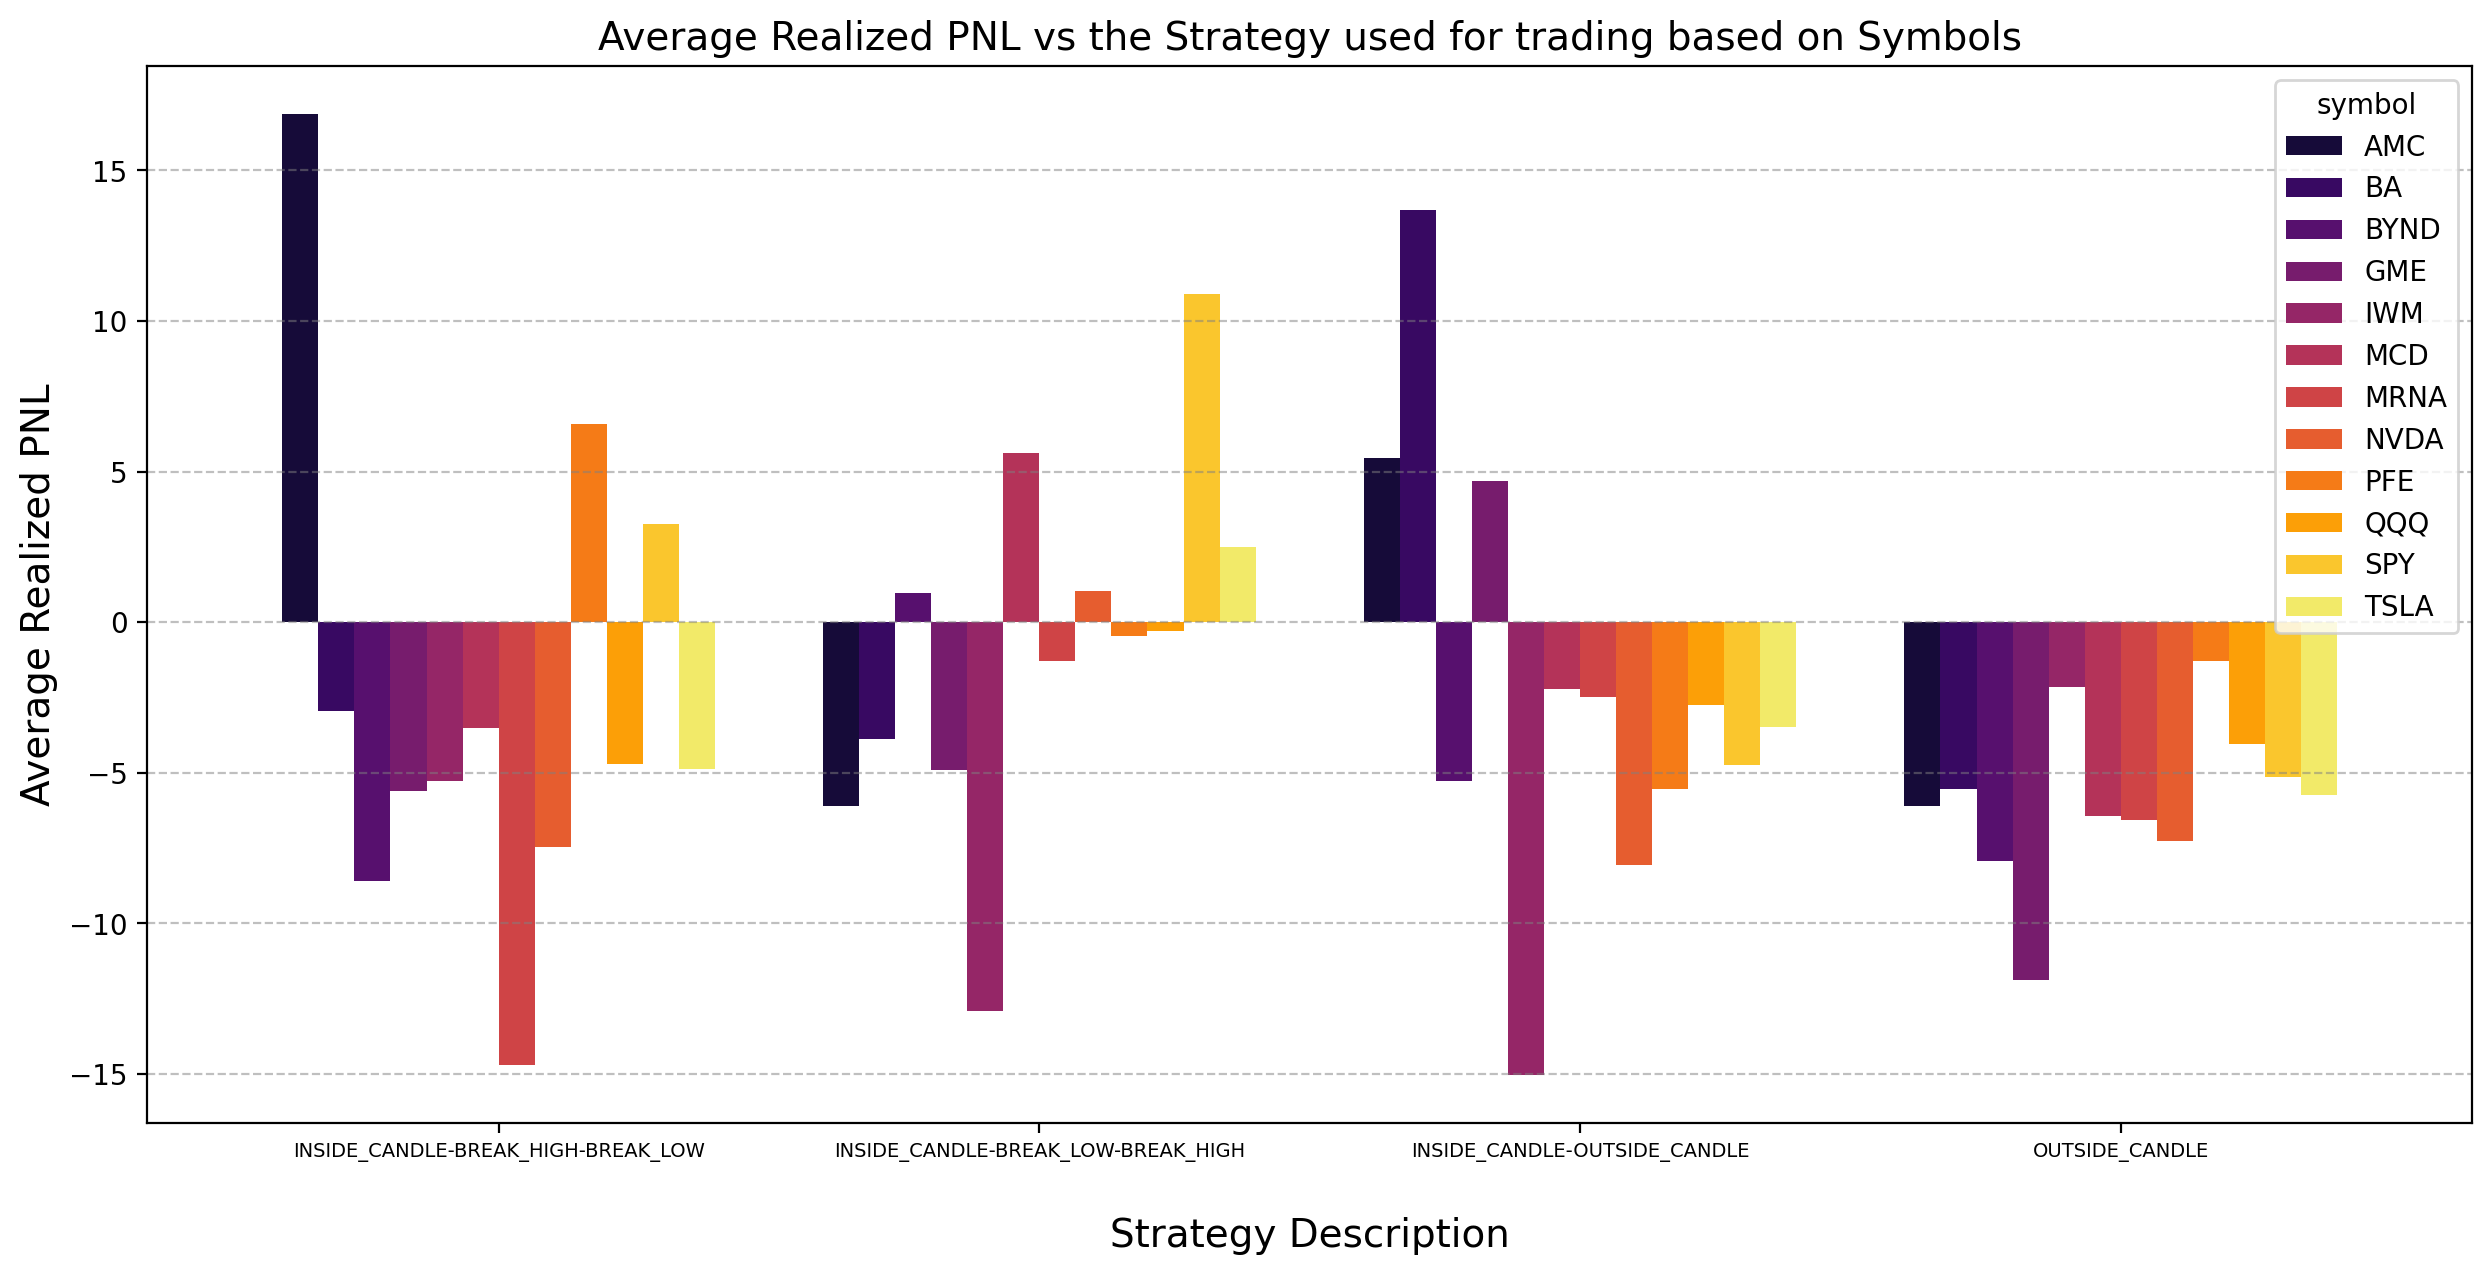

In [69]:
fig, ax = plt.subplots(figsize=(15,7), dpi=200)

colors = cm.inferno_r(np.linspace(.9, .06, len(data['symbol'].unique())))
data.groupby(['strategydescription','symbol']).mean()['realizedpnl'].unstack().plot(kind = 'bar',ax=ax,
                                                                                    width = 0.8, color = colors)

plt.xticks(rotation = 0, fontsize=7)

plt.xlabel('\nStrategy Description',fontsize=14)
plt.ylabel('Average Realized PNL',fontsize=14)
plt.title('Average Realized PNL vs the Strategy used for trading based on Symbols',fontsize=14)
plt.grid(axis = 'y', color = 'gray', linestyle = '--', alpha = 0.5)
plt.show()

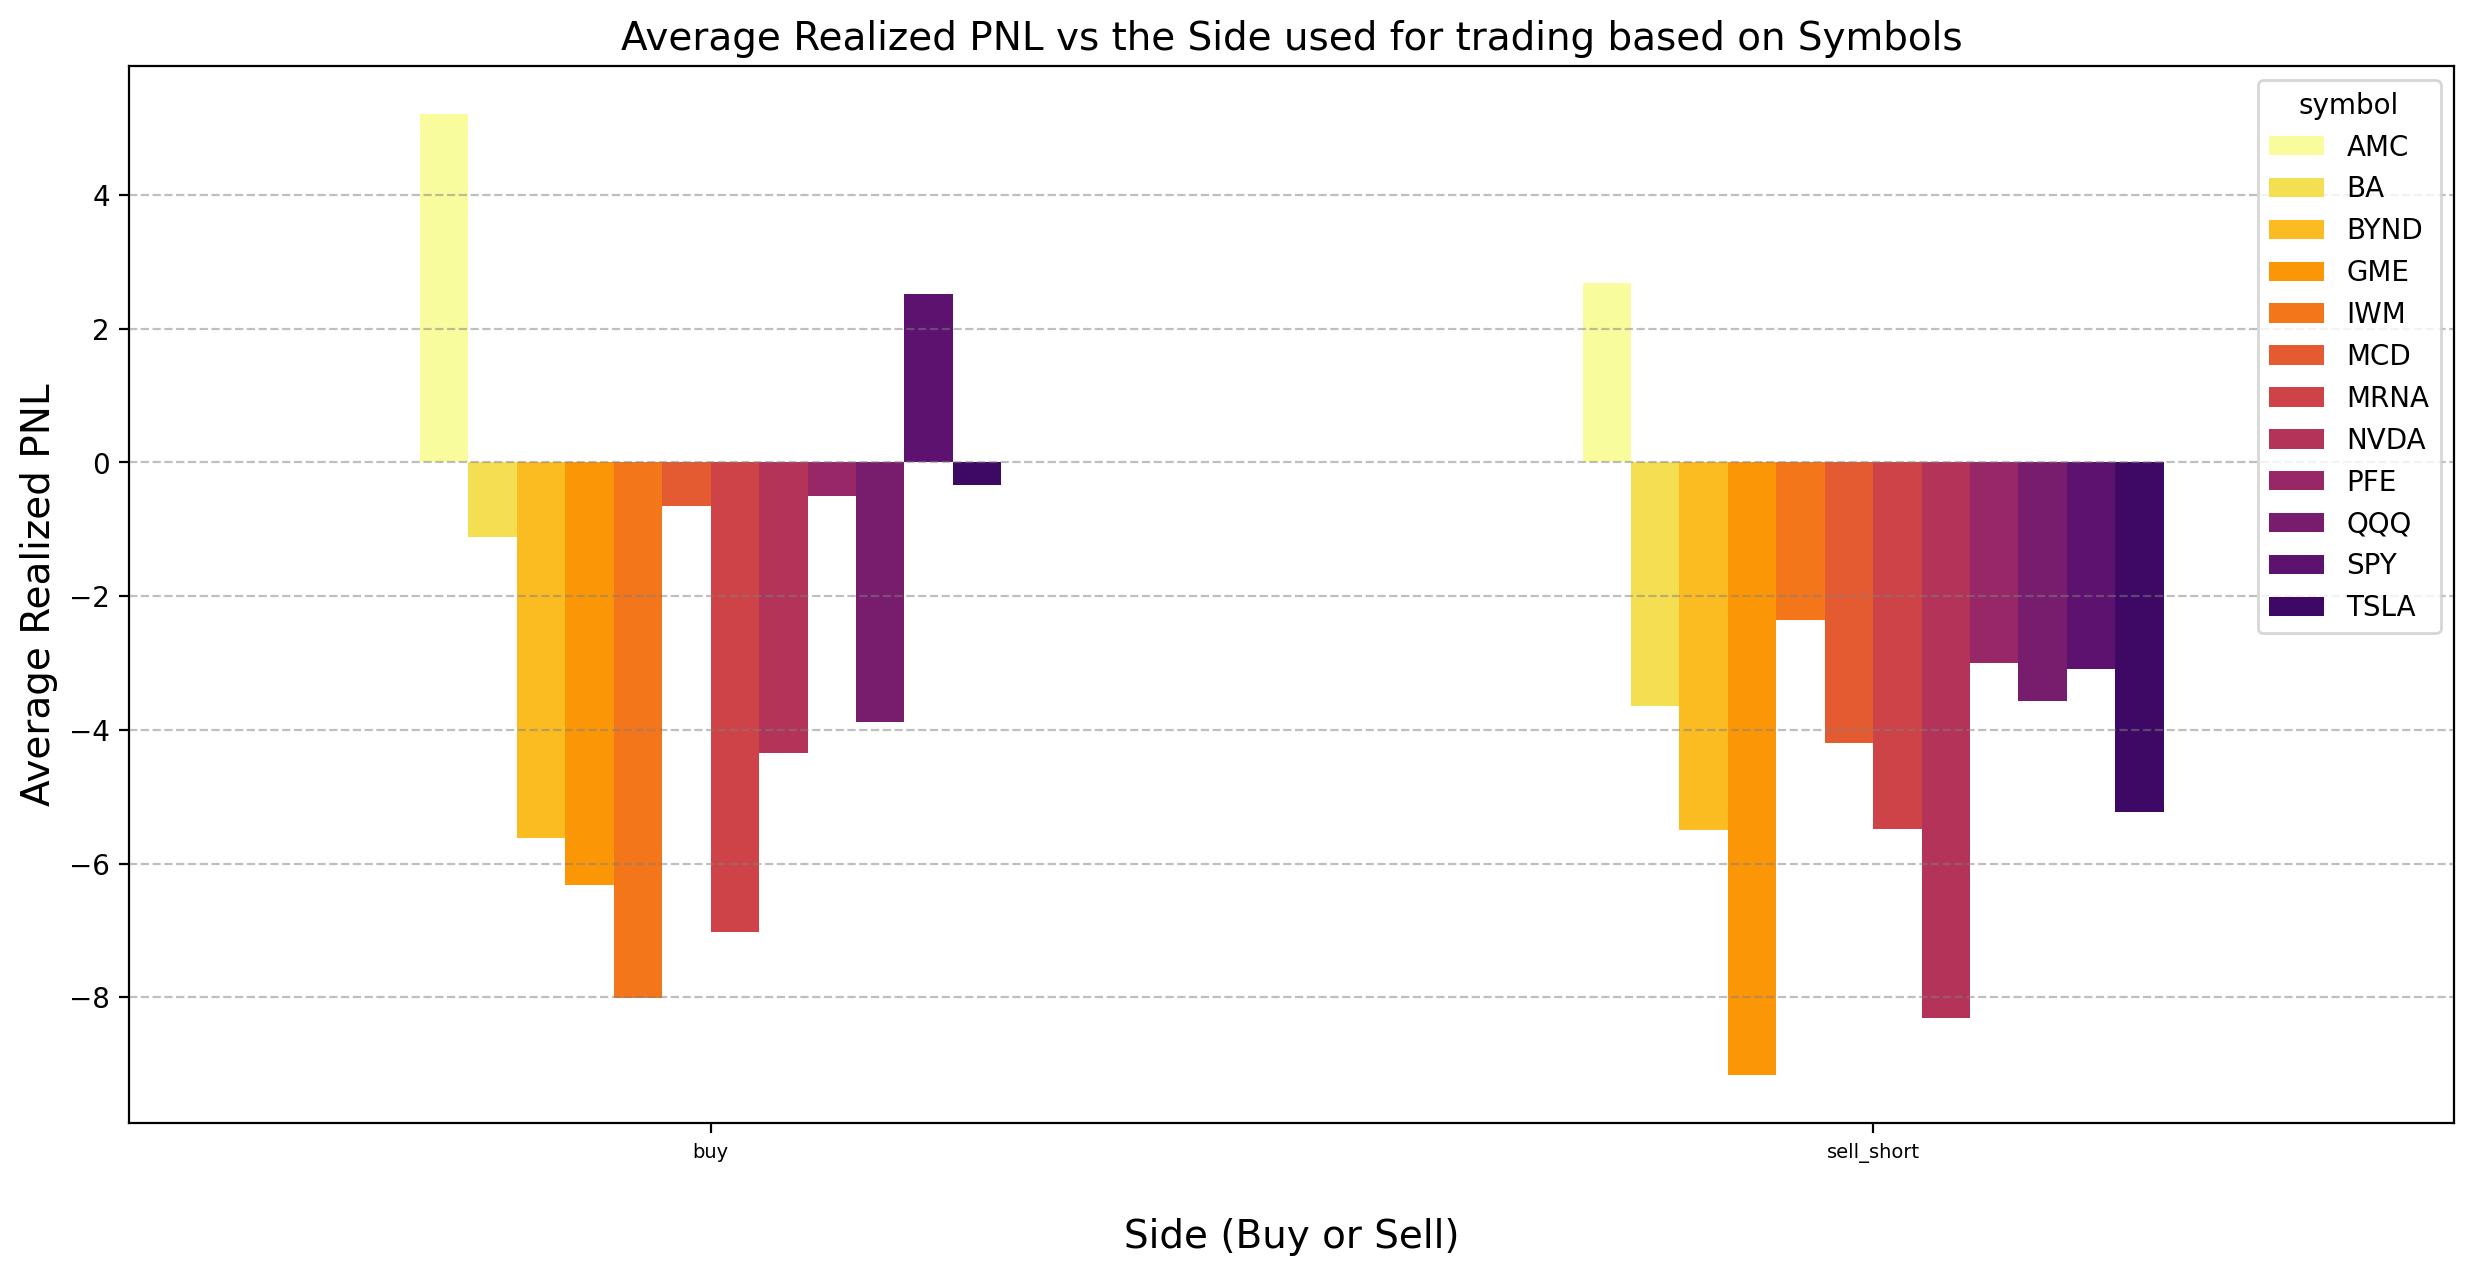

In [70]:
fig, ax = plt.subplots(figsize=(15,7), dpi=200)

colors = cm.inferno_r(np.linspace(.01, .81, len(data['symbol'].unique())))
data.groupby(['side','symbol']).mean()['realizedpnl'].unstack().plot(kind = 'bar',ax=ax,
                                                                                    width = 0.5, color = colors)

plt.xticks(rotation = 0, fontsize=7)

plt.xlabel('\nSide (Buy or Sell)',fontsize=14)
plt.ylabel('Average Realized PNL',fontsize=14)
plt.title('Average Realized PNL vs the Side used for trading based on Symbols',fontsize=14)
plt.grid(axis = 'y', color = 'gray', linestyle = '--', alpha = 0.5)
plt.show()